## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./bank-additional-full.csv", sep=";")
display(data.head(5))
print("Statistical information:")
data.describe()
print(f"Dimension of dataset: {data.shape}")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Statistical information:
Dimension of dataset: (41188, 21)


**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [3]:
bank_target_map = {"yes": 1, "no": 0}
bank_target = data["y"].map(bank_target_map)

display(bank_target.head(5))

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [4]:
bank_client = data[["age", "job", "marital", "education", "default", "housing", "loan"]]
bank_client_values = bank_client.value_counts()

def get_unique_values(df, column):
    return pd.DataFrame(df[column].value_counts())

for column in bank_client:
    display(get_unique_values(bank_client, column))

,count
age,
31,1947
32,1846
33,1833
36,1780
35,1759
...,...
89,2
91,2
94,1


,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060


,count
marital,
married,24928
single,11568
divorced,4612
unknown,80


,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


,count
default,
no,32588
unknown,8597
yes,3


,count
housing,
yes,21576
no,18622
unknown,990


,count
loan,
no,33950
yes,6248
unknown,990


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Minimum value:
17

Maximum value:
98

Number of missing values:
0


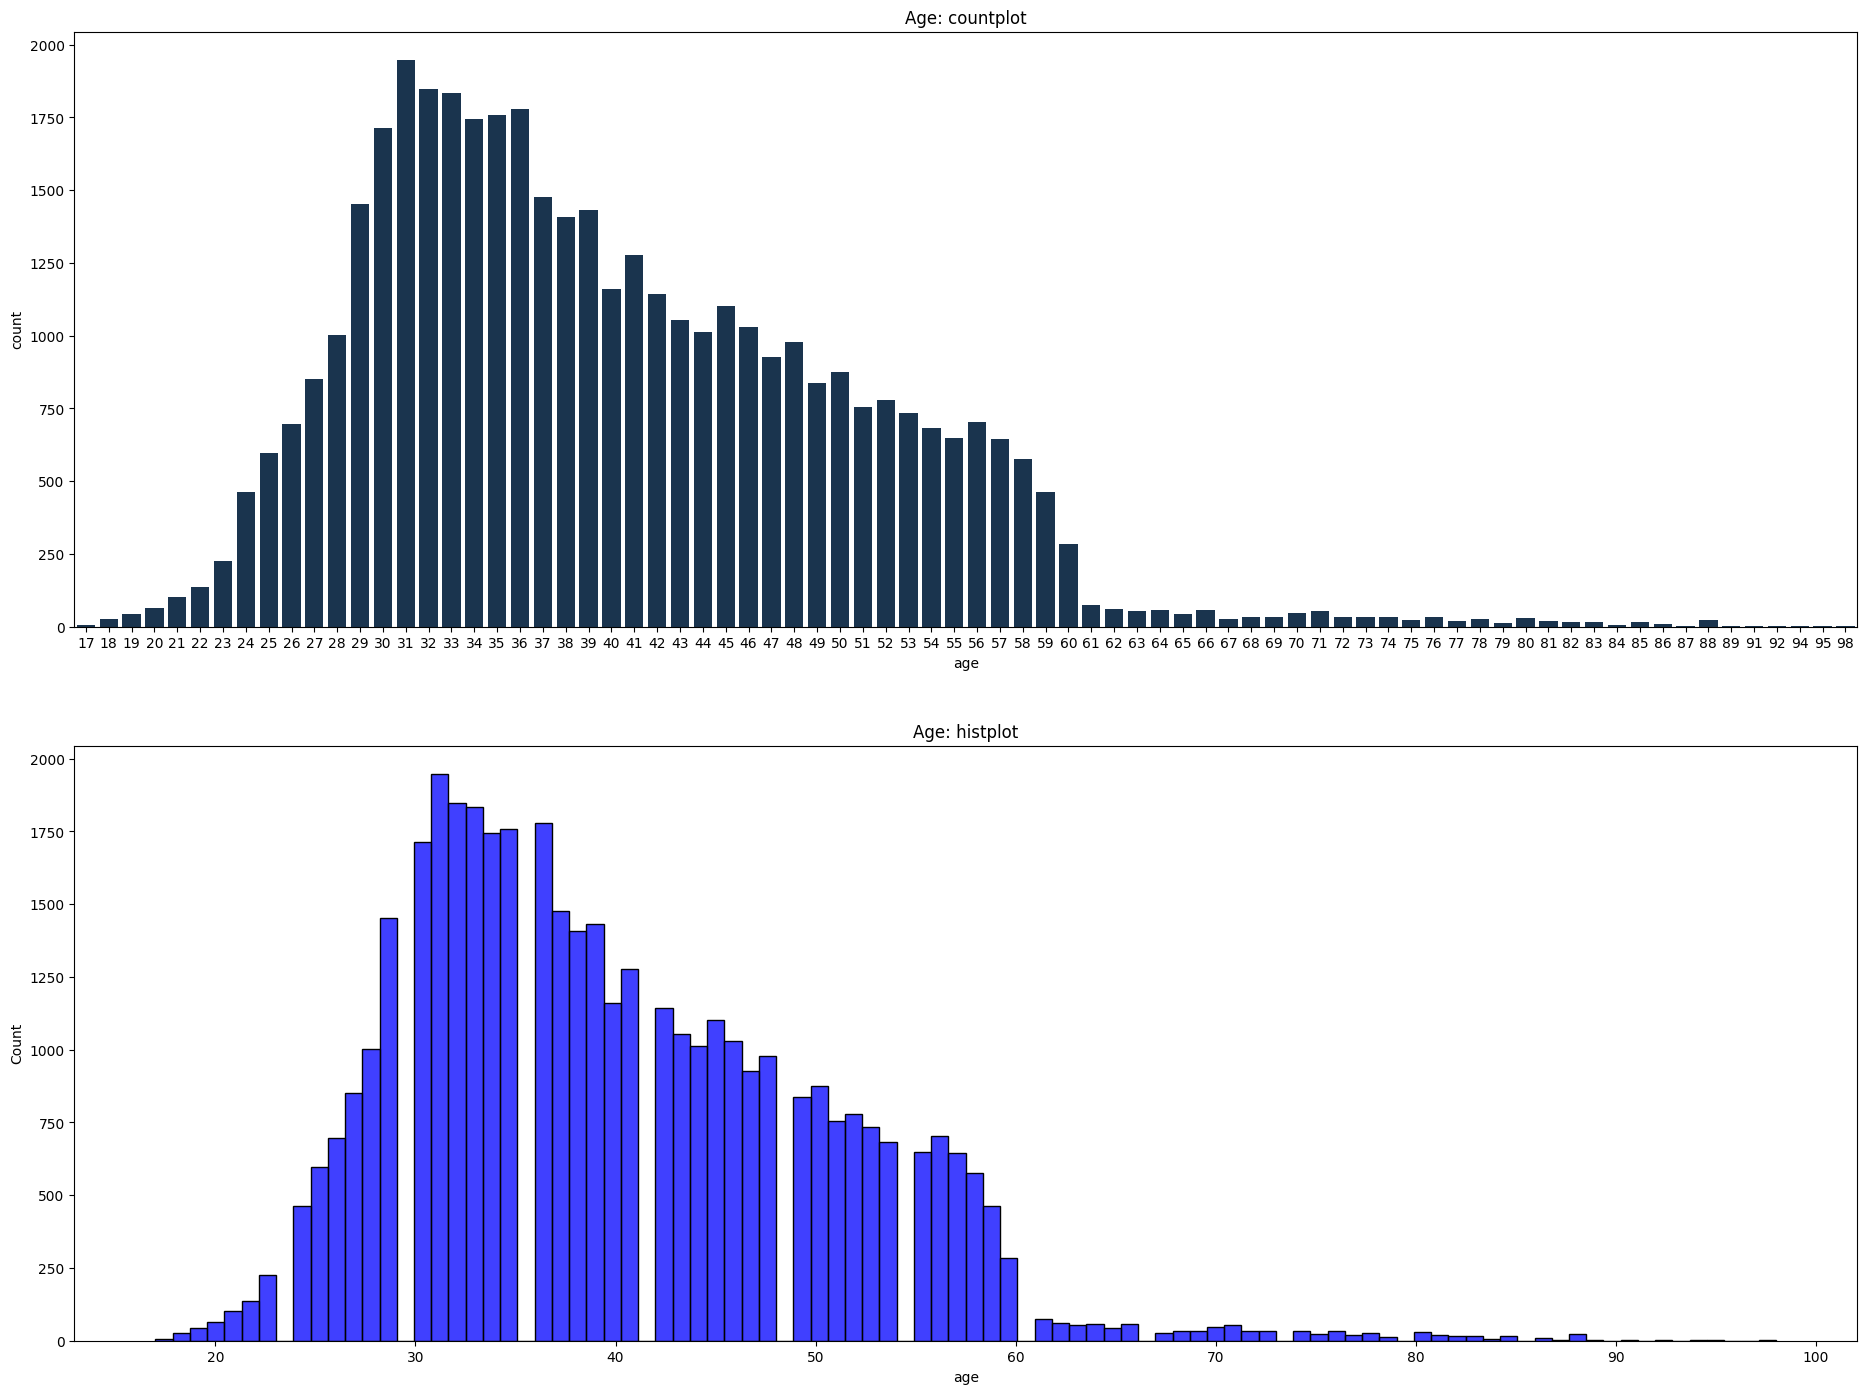

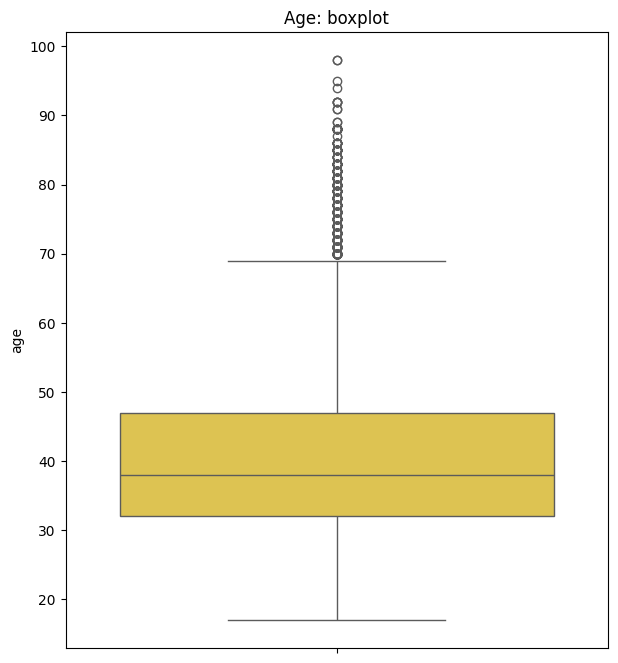

Skewness of age plot: 0.7846968157646645. The distribution has a heavier right tail.


In [5]:
def check_skew(sk, value):
    if sk > 0.1:
        print(f"Skewness of {value} plot: {sk}. The distribution has a heavier right tail.")
    elif sk < -0.1:
        print(f"Skewness of {value} plot: {sk}. The distribution has a heavier left tail.")
    else:
        print(f"Skewness of {value} plot: {sk}. The distribution is relatively symmetric.")

print("Minimum value:")
print(data["age"].min())

print("\nMaximum value:")
print(data["age"].max())

print("\nNumber of missing values:")
print(data["age"].isnull().sum())

fig, ((ax1), (ax2)) = plt.subplots(2, 1, figsize=(23, 17))

sns.countplot(data=data, x="age", ax=ax1, color="#123456")
ax1.set_title("Age: countplot")

sns.histplot(data=data, x="age", ax=ax2, color="blue")
ax2.set_title("Age: histplot")

fig, ax3 = plt.subplots(figsize=(7, 8))
sns.boxplot(data=data, y="age", ax=ax3, color="#F4D13B")
ax3.set_title("Age: boxplot")

plt.show()

skewness = data["age"].skew()
check_skew(skewness, "age")

**Висновки з 1-4 завдання (детальні)**

1. Розм. датасету Dimension of dataset: (41188, 21) 
2. Таргетом є колонка y, яка вказує на те, оформив клієнт депозит чи ні. Має значення yes та no.
3. Клієнтів банку характеризують такі змінні: age, job, marital, education, default, housing, loan.
4. Мін. та макс. вік клаєнтів від 17 до 98 років. Розподіл в колонці "вік" схожий на нормальний, але має важчий правий хвіст, що свідчить про те, що найбільша кількість значень зосереджена лівіше від моди. Мода дорівнює 31. Медіана знаходиться в межах 37-38 років. Квартиль Q1 - 31-32 р., Q3 - це 46-47 р.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [6]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    sorted_data = np.sort(df[column])
    Q1 = np.percentile(sorted_data, low_percentile)
    Q2 = data["age"].median()
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q2 percentile of the given data: {Q2}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1

    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')

    low_lim = Q1 - (IQR * 1.5)
    up_lim = Q3 + (IQR * 1.5)

    print('')
    print(f"Lower bound: {low_lim}")
    print('')
    print(f"Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')

    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]

    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q2 percentile of the given data: 38.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

Lower bound: -12.5

Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1. Нижній та верхній перцентилі складають відповідно 10 та 90. Кількість викидів може змінюватись залежно від цих значень. Медіана (Q2) - 38. IQR - це розмах між Q1 та Q3 квартилями. Нижня межа (low_lim) розраховується як Q1 - 1.5 * IQR і дорівнює -12.5. Однак, враховуючи відсутність від'ємних значень в колонці віку, це може бути некоректно. Верхня межа (up_lim) - Q3 + 1.5 * IQR, дорівнює 95.5. Всі значення вище цієї межі вважаються викидами. У нашому випадку викидами є значення 98 (два рядки), яке є максимальним в колонці віку.

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

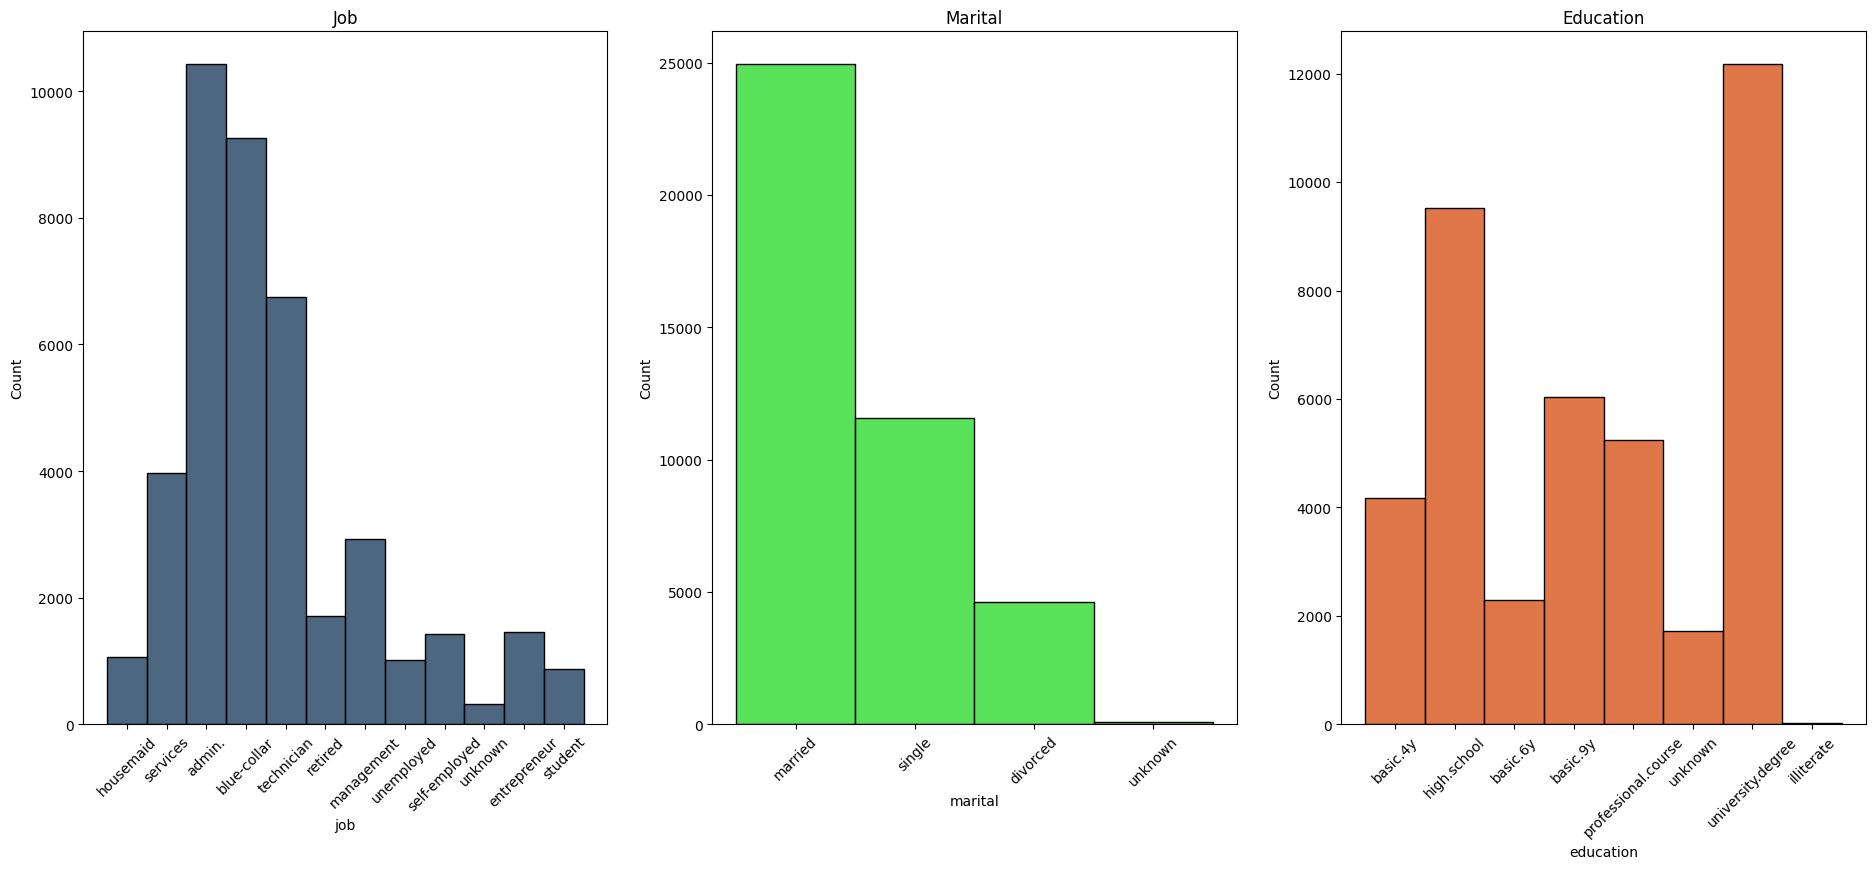

In [7]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(23, 9))

sns.histplot(data=data, x="job", ax=ax1, color="#123456")
ax1.tick_params(axis='x', rotation=45)
ax1.set_title("Job")

sns.histplot(data=data, x="marital", ax=ax2, color="#22d822")
ax2.tick_params(axis='x', rotation=45)
ax2.set_title("Marital")

sns.histplot(data=data, x="education", ax=ax3, color="#d64a0c")
ax3.tick_params(axis='x', rotation=45)
ax3.set_title("Education")

plt.show()

**Висновки з завдання 6 (детальні)**

1. Job - відповідає за роботу клієнта. Найчастіше зустрічається значення "admin", а найрідше - "unknown".
Marital - відповідає за сімейний стан клієнта. Найбільш поширене значення - "married", а найменше - "unknown".
Education - відповідає за рівень освіти клієнта. Найчастіше зустрічається "university degree", а найменше - "unknown". Другим найпоширенішим є "high school".

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

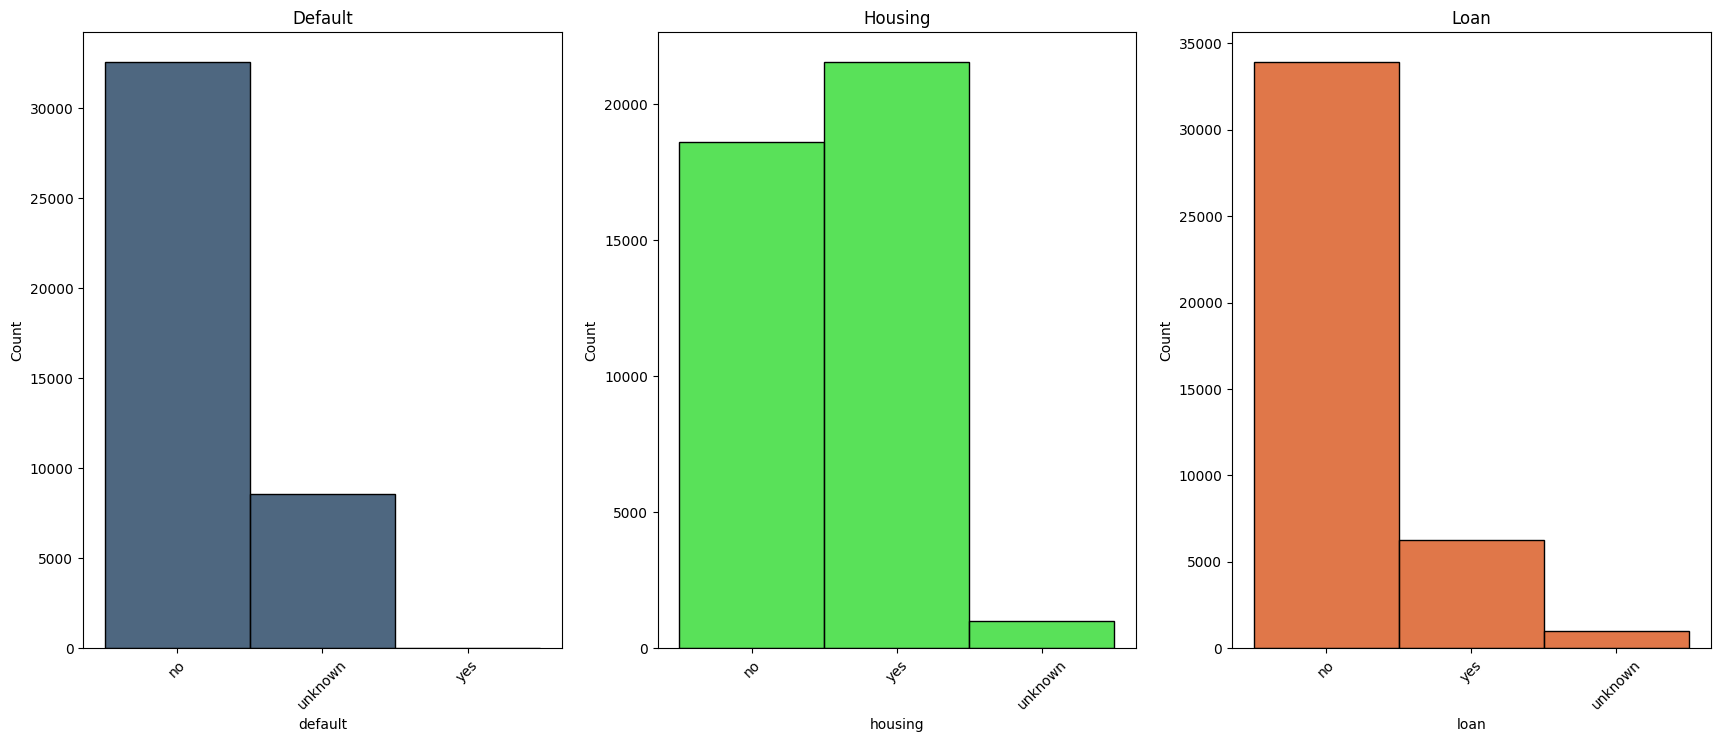

In [8]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(21, 8))

sns.histplot(data=data, x="default", ax=ax1, color="#123456")
ax1.tick_params(axis='x', rotation=45)
ax1.set_title("Default")

sns.histplot(data=data, x="housing", ax=ax2, color="#22d822")
ax2.tick_params(axis='x', rotation=45)
ax2.set_title("Housing")

sns.histplot(data=data, x="loan", ax=ax3, color="#d64a0c")
ax3.tick_params(axis='x', rotation=45)
ax3.set_title("Loan")

plt.show()

**Висновки з завдання 7 (детальні)**

1. Default - відповідає за те, чи клієнт не виплачував кредит. Найбільш поширене значення - "no", а найменш - "yes".
Housing - відповідає за те, чи має клієнт кредит на житло. Найчастіше відповідь - "yes", а рідше - "unknown".
Loan - відповідає за те, чи має клієнт загальний кредит. Найпоширеніше значення - "no", а найрідше - "unknown".

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [9]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col].notnull()
        df.loc[not_null, col] = le.fit_transform(df.loc[not_null, col])
    return df

bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing', 'loan'])

display(bank_client.head(3))
bank_client.isnull().sum()

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0


age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64

**Висновки з завдання 8 (детальні)**

1. Кожна змінна була перетворена на числовий формат. Після перевірки виявлено, що пропусків немає, тому трансформація пройшла успішно.

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [10]:
def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    q_values = dataframe[age_col].quantile([0, 0.25, 0.5, 0.75, 1])
    q_labels = [0, 1, 2, 3]

    print(q_values)
  
    dataframe["age_bins"] = pd.cut(dataframe[age_col], bins=q_values, labels=q_labels, include_lowest=True)

    return dataframe

bank_client = encode_age(bank_client, 'age')
display(bank_client.head(3))
bank_client["age_bins"].isnull().sum()


0.00    17.0
0.25    32.0
0.50    38.0
0.75    47.0
1.00    98.0
Name: age, dtype: float64


,age,job,marital,education,default,housing,loan,age_bins
0,56,3,1,0,0,0,0,3
1,57,7,1,3,1,0,0,3
2,37,7,1,3,0,2,0,1


0

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

1. Категоризація віку була виконана з використанням квартильних значень: 25% (32), 50% (38) та 75% (47).
Значення розділені на чотири категорії:

Категорія 0 - від мінімального віку до 25% квартиля (включно).
Категорія 1 - від 25% квартиля до медіани.
Категорія 2 - від медіани до 75% квартиля.
Категорія 3 - від 75% квартиля до максимального віку (включно).
Кожне значення віку призначено одній з цих категорій (від 0 до 3). Перевірка показала відсутність пропусків, тому можна вважати, що категоризація пройшла успішно.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [11]:
bank_relat = data[["contact", "month", "day_of_week", "duration"]]
display(bank_relat.head(5))
bank_relat.isna().sum()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


contact        0
month          0
day_of_week    0
duration       0
dtype: int64

**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [12]:
def get_unique_values(df, cols):
    for col in cols:
        unique_values = df[col].unique().tolist()
        print(f"Column: {col}")
        display(unique_values)

get_unique_values(bank_relat, ["contact", "month", "day_of_week"])


Column: contact


['telephone', 'cellular']

Column: month


['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']

Column: day_of_week


['mon', 'tue', 'wed', 'thu', 'fri']

# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



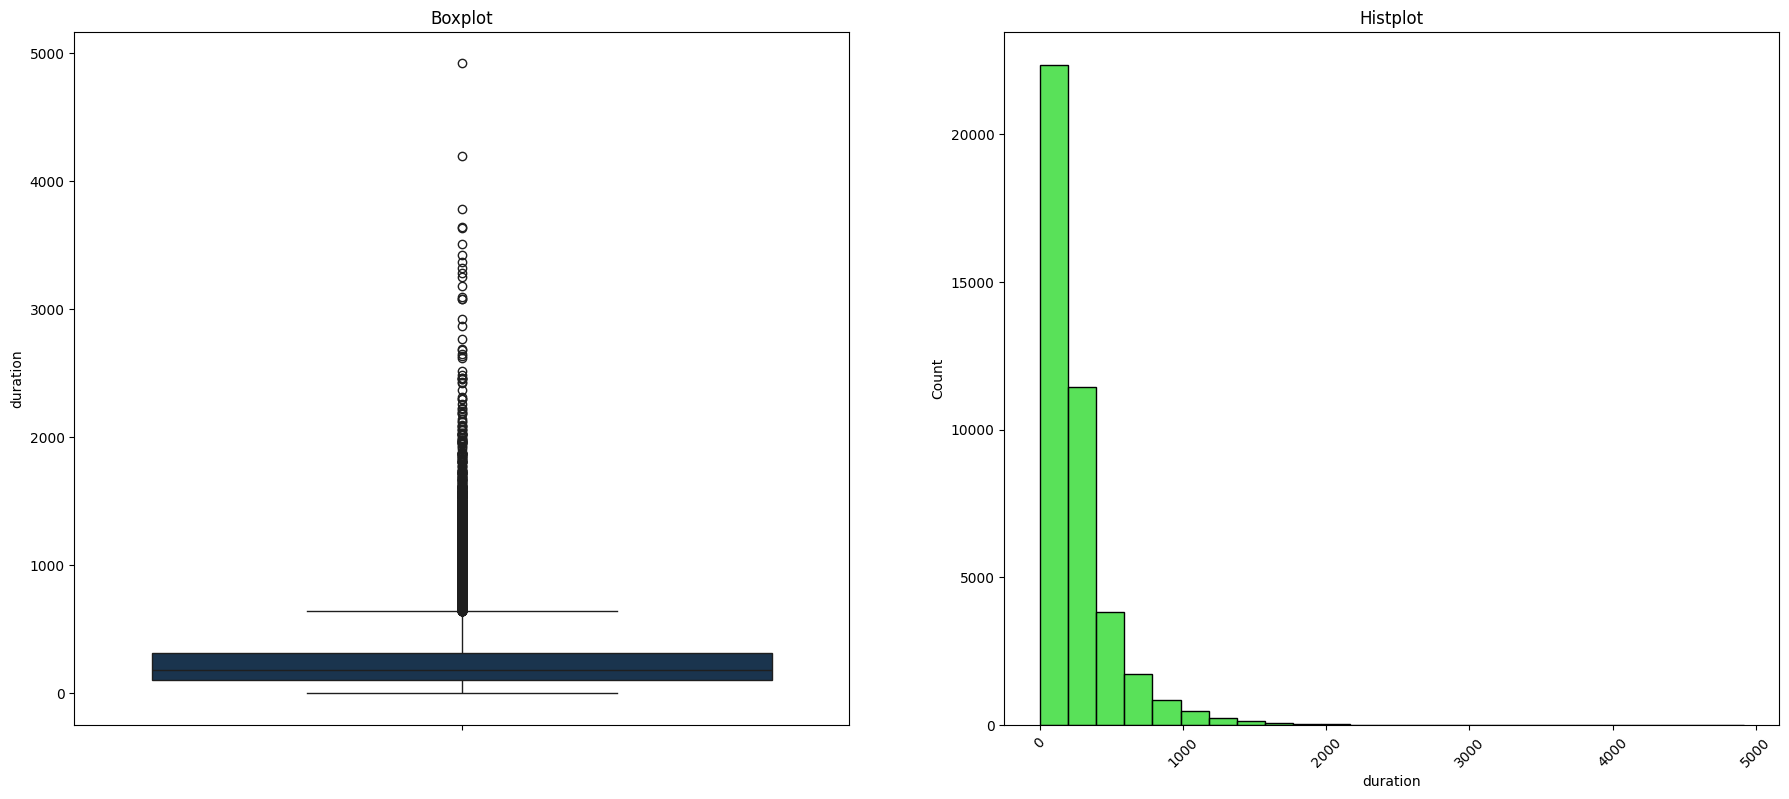

Skewness of duration plot: 3.263141255262832. The distribution has a heavier right tail.


In [13]:
fig, ((ax1), (ax2)) = plt.subplots(1, 2, figsize=(22, 9))

sns.boxplot(data=data, y="duration", ax=ax1, color="#123456")
ax1.tick_params(axis='x', rotation=45)
ax1.set_title("Boxplot")

sns.histplot(data=data, x="duration", ax=ax2, color="#22d822", bins=25)
ax2.tick_params(axis='x', rotation=45)
ax2.set_title("Histplot")

plt.show()

skewness = data["duration"].skew()
check_skew(skewness, "duration")

**Висновки до 12 завдання**

1. Графік демонструє розподіл, подібний до експоненційного, з важчим правим хвостом. Більшість дзвінків тривають близько 16-17 хвилин, але є дуже мало довших дзвінків. Боксплот показує, що більшість значень знаходиться в межах 0-400 секунд, максимальна межа приблизно 700 секунд.

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [14]:
bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])
display(bank_relat.head(5))

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [15]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    q_values = dataframe[duration_col].quantile([0, 0.25, 0.5, 0.75, 1])
    q_labels = [0, 1, 2, 3]

    print(q_values)
  
    dataframe["duration_bins"] = pd.cut(dataframe[duration_col], bins=q_values, labels=q_labels, include_lowest=True)
          
    return dataframe

bank_relat = encode_duration(bank_relat, 'duration')

display(bank_relat.head(3))
bank_relat.isnull().sum()

0.00       0.0
0.25     102.0
0.50     180.0
0.75     319.0
1.00    4918.0
Name: duration, dtype: float64


,contact,month,day_of_week,duration,duration_bins
0,1,6,1,261,2
1,1,6,1,149,1
2,1,6,1,226,2


contact          0
month            0
day_of_week      0
duration         0
duration_bins    0
dtype: int64

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [16]:
bank_socec = data[["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]
display(bank_socec.head(5))

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [17]:
bank_other = data[["campaign", "pdays", "previous", "poutcome"]]
display(bank_other.head(5))

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [18]:
display(bank_other["poutcome"].unique().tolist())
bank_other = encode_categorical_columns(bank_other, ['poutcome'])
display(bank_other.head(5))

['nonexistent', 'failure', 'success']

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [19]:
bank_final= pd.concat([bank_client, bank_relat, bank_socec, bank_other, bank_target], axis=1)
bank_final = bank_final.drop(["age"], axis="columns")
display(bank_final.head(5))
print("Count of skips:")
display(bank_final.isnull().sum())


,job,marital,education,default,housing,loan,age_bins,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome,y
0,3,1,0,0,0,0,3,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
1,7,1,3,1,0,0,3,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
2,7,1,3,0,2,0,1,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
3,0,1,1,0,0,0,2,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
4,7,1,3,0,0,2,3,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0


Count of skips:


job               0
marital           0
education         0
default           0
housing           0
loan              0
age_bins          0
contact           0
month             0
day_of_week       0
duration          0
duration_bins     0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

**Висновки до 18 завдання**

1. Пропусків немає, це означає що дані перетворенні правильно, також обєднали в 1 датафрейм.

**Завдання 19** Провести ділення вибірки

In [20]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    
    X = X.drop("y", axis="columns")
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    return X_train, X_test

X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, bank_target, 0.2, 10, 101)
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_test, logpred))

log_accuracy = round(accuracy_score(y_test, logpred),2)*100
print(f"\nAccuracy score: {log_accuracy}%")

log_precision = round(precision_score(y_test, logpred),2)*100
print(f"\nPrecision score: {log_precision}%")

log_recall = round(recall_score(y_test, logpred),2)*100
print(f"\nRecall score: {log_recall}%")

LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(f"\nCross-Validation Score: {LOGCV}")

Confusion matrix:
[[7073  206]
 [ 590  369]]

Accuracy score: 90.0%

Precision score: 64.0%

Recall score: 38.0%

Cross-Validation Score: 0.9041052743337776


## k-NN

k=1 88.41 (+/- 0.46)
k=2 89.79 (+/- 0.55)
k=3 89.82 (+/- 0.48)
k=4 90.22 (+/- 0.45)
k=5 90.18 (+/- 0.65)
k=6 90.48 (+/- 0.57)
k=7 90.55 (+/- 0.57)
k=8 90.60 (+/- 0.46)
k=9 90.72 (+/- 0.52)
k=10 90.70 (+/- 0.53)
k=11 90.85 (+/- 0.59)
k=12 90.73 (+/- 0.60)
k=13 90.87 (+/- 0.59)
k=14 90.77 (+/- 0.57)
k=15 90.90 (+/- 0.58)
k=16 90.75 (+/- 0.56)
k=17 90.87 (+/- 0.59)
k=18 90.83 (+/- 0.52)
k=19 90.94 (+/- 0.60)
k=20 90.82 (+/- 0.47)
k=21 90.91 (+/- 0.49)
k=22 90.85 (+/- 0.48)
k=23 90.85 (+/- 0.53)
k=24 90.83 (+/- 0.50)
k=25 90.87 (+/- 0.51)
The optimal number of neighbors is 18 with 90.9%


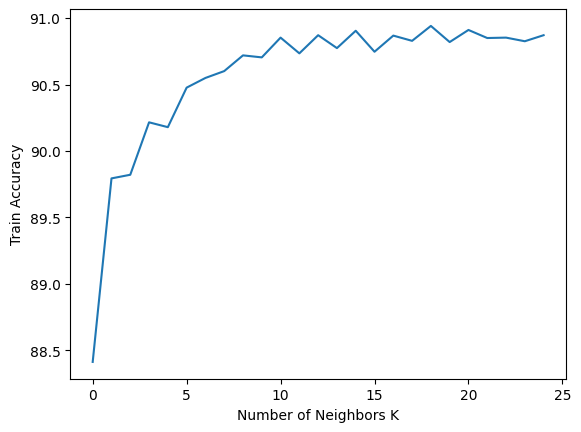

In [22]:
neighbors = np.arange(0,25)
cv_scores = []

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [23]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_test, knnpred))

knn_accuracy = round(accuracy_score(y_test, knnpred) * 100, 2)
print(f"\nAccuracy score: {knn_accuracy}%")

knn_precision = round(precision_score(y_test, knnpred) * 100, 2)
print(f"\nPrecision score: {knn_precision}%")

knn_recall = round(recall_score(y_test, knnpred) * 100, 2)
print(f"\nRecall score: {knn_recall}%")

KNNCV = round(cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean() * 100, 2)
print(f"\nKNNCV score: {KNNCV}")


Confusion matrix:
[[7131  148]
 [ 640  319]]

Accuracy score: 90.43%

Precision score: 68.31%

Recall score: 33.26%

KNNCV score: 90.03


## Логістична Регресія

In [24]:
models = pd.DataFrame({
                'Models': ["Logistic Regression", "K-Nearest Neighbors"],
                'Accuracy score':  [log_accuracy, knn_accuracy],
                'Precision score': [log_precision, knn_precision],
                "Recall score": [log_recall, knn_recall],
                "CV score": [LOGCV, KNNCV]
                })

models_sorted = models.sort_values(by='CV score', ascending=False)
display(models_sorted)


,Models,Accuracy score,Precision score,Recall score,CV score
1,K-Nearest Neighbors,90.43,68.31,33.26,90.030000
0,Logistic Regression,90.00,64.00,38.00,0.904105


**Висновки по моделям (детальні)**

1. Перед тренуванням кожної моделі ми поділили наш набір даних (який складається з датафрейму bank_final, сформованого з усіх попередньо перетворених даних) на навчальні та тестові дані. Цільова змінна визначається атрибутом 'y', що показує, чи підпише клієнт терміновий депозит. Ми використовували метод KFold для розділення набору даних на рівні частини (у нашому випадку, на 10 частин). На кожній ітерації одна з k підмножин слугує тестовими даними, а всі k-1 підмножини - навчальними даними. Таке розділення допомагає зробити нашу модель більш надійною.
_____________________

**Модель логістичної регресії**
Accuracy score - 90% - високий показник правильно класифікованих даних.

Precision score - 64% - показує, що лише 64% позитивних значень було визначено правильно, що може вказувати на помилки в класифікації певних класів.

Recall score - 39% - відображає, що лише 39% позитивних значень було виявлено правильно. Це може бути показником того, що модель пропускає певні позитивні випадки.

Cross-Validation score - 0.9041 - цей показник також високий, близький до 1, що свідчить про загальну високу точність моделі.

_______________________


**Модель методу k-найближчих сусідів:**

Accuracy score: 90% - цей показник такий самий, як і у логістичній моделі, що свідчить про високу точність класифікації.

Precision score: 68% - цей показник вказує на те, що 68% позитивних значень було класифіковано правильно.

Recall score: 33% - це відображає, що лише 33% позитивних значень було виявлено правильно. Це може означати, що модель пропускає деякі позитивні випадки.

Cross-Validation score: 0.9003 - цей показник також високий, близький до 1, що свідчить про загальну високу точність моделі.

________________________

Висновок: Модель логістичної регресії дещо точніша за модель методу k-найближчих сусідів, але загалом результати подібні. Показники Accuracy та CV score в обох випадках високі, але точність (Precision) та чутливість (Recall) низькі.
